In [ ]:
!pip install patchify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install -U segmentation-models

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 7.4 MB/s eta 0:00:00


In [ ]:
!pip install -U tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import cv2
from PIL import Image
import numpy as np
from patchify import patchify
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import random


ModuleNotFoundError: ignored

In [ ]:
%matplotlib inline

In [ ]:
minmaxscaler = MinMaxScaler()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

In [ ]:
!ls -lah '/content/drive/MyDrive/Colab Notebooks/data'

In [ ]:
dataset_root_folder = '/content/drive/MyDrive/Colab Notebooks/'
dataset_name = 'data'

In [ ]:
for path, subsdirs, files in os.walk(os.path.join(dataset_root_folder, dataset_name)):
  dir_name = path.split("/")[-1]
  #print(dir_name)
  if dir_name == 'masks':
    images = os.listdir(path)
    print(path)
    for i, image_name in enumerate(images):
      #print(image_name)
      a = 1

In [ ]:
image_patch_size = 256

In [ ]:
image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile 1/images/image_part_001.jpg', 1)
image.shape

In [ ]:
help(patchify)

In [ ]:
image_dataset = []
mask_dataset = []

for image_type in ['images', 'masks']:
  if image_type == 'images':
    image_extension = 'jpg'
  elif image_type == 'masks':
    image_extension = 'png'

  for tile_id in range(1,8):
    for image_id in range(1, 20):
      image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extension}', 1)
      if image is not None:
        if image_type == 'masks':
          image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        size_x = (image.shape[1]//image_patch_size) * image_patch_size
        size_y = (image.shape[0]//image_patch_size) * image_patch_size
        #print("{}-----{}--{}".format(image.shape, size_x, size_y))

        #Transformer le l'image (matrice) de type np.array en objet image
        image = Image.fromarray(image)

        #recadrer l'image
        image = image.crop((0, 0, size_x, size_y))

        #retransformer l'objet image en array
        image = np.array(image)

        patched_images = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)
        for i in range(patched_images.shape[0]):
          for j in range(patched_images.shape[1]):

            #Recuperer chaque image contenu dans chaque patch de l'image globale
            individual_patched_image = patched_images[i, j]
            #print(individual_patched_image.shape)

            if image_type == 'images':
              #Normalisation de l'image (normaliser les valeurs entre 0 et 1)
              individual_patched_image = minmaxscaler.fit_transform(individual_patched_image.reshape(-1, individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)

              #Recuperer la matrice exacte de l'image
              individual_patched_image = individual_patched_image[0]
              #print(individual_patched_image.shape)
              image_dataset.append(individual_patched_image)

            elif image_type == 'masks':
              #Recuperer la matrice exacte du mask
              individual_patched_mask = individual_patched_image[0]
              mask_dataset.append(individual_patched_mask)

NameError: ignored

In [ ]:
image_dataset = np.array(image_dataset)
mask_dataset = np.array(mask_dataset)

In [ ]:
print(len(image_dataset))
print(len(mask_dataset))

In [ ]:
image_dataset[0]

In [ ]:
mask_dataset[0]

In [ ]:
random_image_id = random.randint(0, len(image_dataset))

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.imshow(image_dataset[0])

plt.subplot(1,2,2)
plt.imshow(mask_dataset[0])

In [ ]:
image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile 1/images/image_part_001.jpg', 1)
mask = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile 1/masks/image_part_001.png', 1)
#mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.imshow(image)

plt.subplot(1,2,2)
plt.imshow(mask)

In [ ]:
class_building = '#3C1098'
class_building = class_building.lstrip('#')
class_building = np.array(tuple(int(class_building[i:i+2], 16) for i in (0, 2, 4)))
print(class_building)

In [ ]:
class_land = '#8429F6'
class_land = class_land.lstrip('#')
class_land = np.array(tuple(int(class_land[i:i+2], 16) for i in (0, 2, 4)))
print(class_land)
#int('84', 16)

In [ ]:
class_road = '#6EC1E4'
class_road = class_road.lstrip('#')
class_road = np.array(tuple(int(class_road[i:i+2], 16) for i in (0, 2, 4)))
print(class_road)

In [ ]:
class_vegetation = '#FEDD3A'
class_vegetation = class_vegetation.lstrip('#')
class_vegetation = np.array(tuple(int(class_vegetation[i:i+2], 16) for i in (0, 2, 4)))
print(class_vegetation)

In [ ]:
class_water = '#E2A929'
class_water = class_water.lstrip('#')
class_water = np.array(tuple(int(class_water[i:i+2], 16) for i in (0, 2, 4)))
print(class_water)

In [ ]:
class_unlabeled = '#9B9B9B'
class_unlabeled = class_unlabeled.lstrip('#')
class_unlabeled = np.array(tuple(int(class_unlabeled[i:i+2], 16) for i in (0, 2, 4)))
print(class_unlabeled)

In [ ]:
label = individual_patched_mask

In [ ]:
def rgb_to_label(label):
  label_segment = np.zeros(label.shape, dtype=np.uint8)
  label_segment[np.all(label == class_water, axis=-1)] = 0
  label_segment[np.all(label == class_land, axis=-1)] = 1
  label_segment[np.all(label == class_road, axis=-1)] = 2
  label_segment[np.all(label == class_building, axis=-1)] = 3
  label_segment[np.all(label == class_vegetation, axis=-1)] = 4
  label_segment[np.all(label == class_unlabeled, axis=-1)] = 5
  # print(label_segment)
  label_segment = label_segment[:,:,0]
  #print(label_segment)

  return label_segment

In [ ]:
labels = []
for i in range(mask_dataset.shape[0]):
  label = rgb_to_label(mask_dataset[i])
  labels.append(label)


In [ ]:
print(len(labels))

In [ ]:
labels = np.array(labels)
#labels[0]

In [ ]:
labels = np.expand_dims(labels, axis=3)

In [ ]:
labels[0]

In [ ]:
np.unique(labels)

In [ ]:
print("total unique labels based on mask: ", format(np.unique(labels )))

In [ ]:
labels[1]

In [ ]:
random_image_id = random.randint(0, len(image_dataset))

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
plt.imshow(labels[random_image_id][:,:,0])

In [ ]:
master_training_dataset = image_dataset

In [ ]:
total_classes = len(np.unique(labels))

In [ ]:
total_classes

In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection  import  train_test_split

In [ ]:
labels_categorical_dataset = to_categorical(labels, num_classes=total_classes)

In [ ]:
labels_categorical_dataset[0]

In [ ]:
master_training_dataset = image_dataset

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(master_training_dataset, labels_categorical_dataset, test_size=0.15, random_state=100)

In [ ]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

In [ ]:
image_height = x_train.shape[1]
image_width = x_train.shape[2]
image_channels = x_train.shape[3]
total_classes = y_train.shape[3]

In [ ]:
print(image_height, image_width, image_channels, total_classes)

In [ ]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.layers import concatenate, BatchNormalization, Dropout, Lambda

In [ ]:
from keras import backend as k

In [ ]:
def jaccard_coef(y_true, y_pred):
  y_true_flatten = k.flatten(y_true)
  y_pred_flatten = k.flatten(y_pred)
  intersection = k.sum(y_true_flatten * y_pred_flatten)
  final_coef_value = (intersection + 1.0) / (k.sum(y_true_flatten) + k.sum(y_pred_flatten) - intersection + 1.0)
  return final_coef_value

In [ ]:
def multi_unet_model(n_classes=5, image_height=256, image_width=256, image_channels=1):

  inputs = Input((image_height, image_width, image_channels))

  source_input = inputs

  c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(source_input)
  c1 = Dropout(0.2)(c1)
  c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c1)
  p1 = MaxPooling2D((2,2))(c1)

  c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p1)
  c2 = Dropout(0.2)(c2)
  c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c2)
  p2 = MaxPooling2D((2,2))(c2)

  c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p2)
  c3 = Dropout(0.2)(c3)
  c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c3)
  p3 = MaxPooling2D((2,2))(c3)

  c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p3)
  c4 = Dropout(0.2)(c4)
  c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c4)
  p4 = MaxPooling2D((2,2))(c4)

  c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p4)
  c5 = Dropout(0.2)(c5)
  c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c5)

  u6 = Conv2DTranspose(128, (2,2), strides=(2,2), padding="same")(c5)
  u6 = concatenate([u6, c4])
  c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u6)
  c6 = Dropout(0.2)(c6)
  c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c6)

  u7 = Conv2DTranspose(64, (2,2), strides=(2,2), padding="same")(c6)
  u7 = concatenate([u7, c3])
  c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u7)
  c7 = Dropout(0.2)(c7)
  c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c7)

  u8 = Conv2DTranspose(32, (2,2), strides=(2,2), padding="same")(c7)
  u8 = concatenate([u8, c2])
  c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u8)
  c8 = Dropout(0.2)(c8)
  c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c8)

  u9 = Conv2DTranspose(16, (2,2), strides=(2,2), padding="same")(c8)
  u9 = concatenate([u9, c1], axis=3)
  c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u9)
  c9 = Dropout(0.2)(c9)
  c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c9)

  outputs = Conv2D(n_classes, (1,1), activation="softmax")(c9)
  model = Model(inputs=[inputs], outputs=[outputs])
  return model

In [ ]:
metrics = ["accuracy", jaccard_coef]

In [ ]:
def get_deep_learning_model():
  return multi_unet_model(n_classes=total_classes,
                          image_height=image_height,
                          image_width=image_width,
                          image_channels=image_channels)

In [ ]:
model = get_deep_learning_model( )

In [ ]:
model.get_config()

In [ ]:
weights = [0.166, 0.166, 0.166, 0.166, 0.166, 0.166]

In [ ]:
%env SM_FRAMEWORK=tf.keras
import segmentation_models as sm

In [ ]:
dice_loss = sm.losses.DiceLoss(class_weights=weights)

In [ ]:
focal_loss = sm.losses.CategoricalFocalLoss()

In [ ]:
total_loss = dice_loss + (1 * focal_loss)

In [ ]:
import tensorflow as tf

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
model.compile(optimizer="adam", loss=total_loss, metrics=metrics)

In [ ]:
model.summary()

In [ ]:
model_history = model.fit(x_train, y_train,
                          batch_size=16,
                          verbose=1,
                          epochs=100,
                          validation_data=(x_test, y_test),
                          shuffle=False)

wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Epoch 1/10
51/51 [==============================] - ETA: 0s - loss: 0.9995 - accuracy: 0.5691 - jaccard_coef: 0.2758

wandb: Adding directory to artifact (/content/wandb/run-20230611_015801-342x138p/files/model-best)... Done. 0.1s


51/51 [==============================] - 30s 215ms/step - loss: 0.9995 - accuracy: 0.5691 - jaccard_coef: 0.2758 - val_loss: 0.9917 - val_accuracy: 0.6586 - val_jaccard_coef: 0.2652
Epoch 2/10
50/51 [============================>.] - ETA: 0s - loss: 0.9793 - accuracy: 0.6880 - jaccard_coef: 0.3776

wandb: Adding directory to artifact (/content/wandb/run-20230611_015801-342x138p/files/model-best)... Done. 0.1s


51/51 [==============================] - 9s 176ms/step - loss: 0.9792 - accuracy: 0.6884 - jaccard_coef: 0.3808 - val_loss: 0.9661 - val_accuracy: 0.7135 - val_jaccard_coef: 0.4297
Epoch 3/10
50/51 [============================>.] - ETA: 0s - loss: 0.9618 - accuracy: 0.7150 - jaccard_coef: 0.4640

wandb: Adding directory to artifact (/content/wandb/run-20230611_015801-342x138p/files/model-best)... Done. 0.1s


51/51 [==============================] - 9s 174ms/step - loss: 0.9618 - accuracy: 0.7156 - jaccard_coef: 0.4664 - val_loss: 0.9601 - val_accuracy: 0.7240 - val_jaccard_coef: 0.4657
Epoch 4/10
50/51 [============================>.] - ETA: 0s - loss: 0.9558 - accuracy: 0.7358 - jaccard_coef: 0.4874

wandb: Adding directory to artifact (/content/wandb/run-20230611_015801-342x138p/files/model-best)... Done. 0.1s


51/51 [==============================] - 9s 176ms/step - loss: 0.9558 - accuracy: 0.7364 - jaccard_coef: 0.4899 - val_loss: 0.9593 - val_accuracy: 0.7315 - val_jaccard_coef: 0.4863
Epoch 5/10
50/51 [============================>.] - ETA: 0s - loss: 0.9502 - accuracy: 0.7518 - jaccard_coef: 0.5115

wandb: Adding directory to artifact (/content/wandb/run-20230611_015801-342x138p/files/model-best)... Done. 0.1s


51/51 [==============================] - 8s 168ms/step - loss: 0.9502 - accuracy: 0.7523 - jaccard_coef: 0.5134 - val_loss: 0.9587 - val_accuracy: 0.7231 - val_jaccard_coef: 0.5014
Epoch 6/10
50/51 [============================>.] - ETA: 0s - loss: 0.9457 - accuracy: 0.7613 - jaccard_coef: 0.5349

wandb: Adding directory to artifact (/content/wandb/run-20230611_015801-342x138p/files/model-best)... Done. 0.1s


51/51 [==============================] - 9s 176ms/step - loss: 0.9457 - accuracy: 0.7618 - jaccard_coef: 0.5374 - val_loss: 0.9568 - val_accuracy: 0.7302 - val_jaccard_coef: 0.5184
Epoch 7/10
51/51 [==============================] - 4s 71ms/step - loss: 0.9418 - accuracy: 0.7726 - jaccard_coef: 0.5589 - val_loss: 0.9617 - val_accuracy: 0.7271 - val_jaccard_coef: 0.5235
Epoch 8/10
51/51 [==============================] - 4s 71ms/step - loss: 0.9376 - accuracy: 0.7849 - jaccard_coef: 0.5779 - val_loss: 0.9587 - val_accuracy: 0.7304 - val_jaccard_coef: 0.5329
Epoch 9/10
50/51 [============================>.] - ETA: 0s - loss: 0.9354 - accuracy: 0.7936 - jaccard_coef: 0.5899

wandb: Adding directory to artifact (/content/wandb/run-20230611_015801-342x138p/files/model-best)... Done. 0.1s


51/51 [==============================] - 9s 178ms/step - loss: 0.9354 - accuracy: 0.7940 - jaccard_coef: 0.5923 - val_loss: 0.9469 - val_accuracy: 0.7592 - val_jaccard_coef: 0.5580
Epoch 10/10
51/51 [==============================] - 4s 71ms/step - loss: 0.9315 - accuracy: 0.8035 - jaccard_coef: 0.6117 - val_loss: 0.9723 - val_accuracy: 0.7057 - val_jaccard_coef: 0.5121


In [ ]:
model.save('imagesattelitesegmentation.h5')

In [ ]:
history_a = model_history

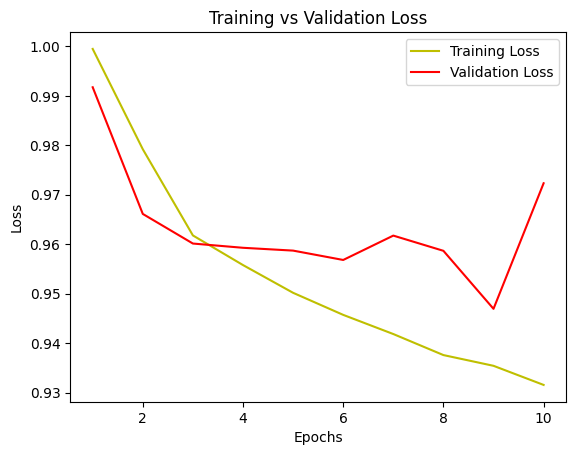

<Figure size 640x480 with 0 Axes>

In [ ]:
loss = history_a.history['loss']
val_loss = history_a.history['val_loss']

epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'y', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.savefig('trainValLoss.png')

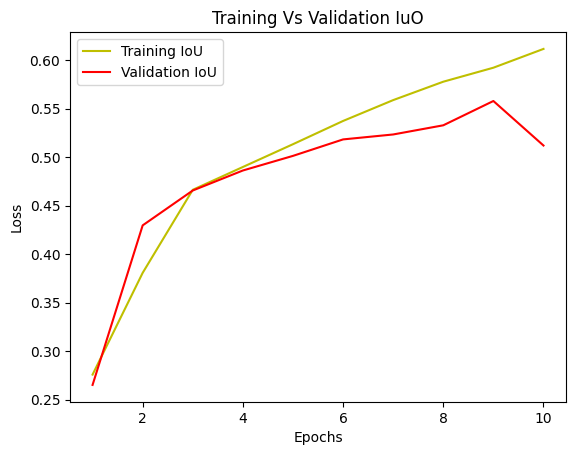

<Figure size 640x480 with 0 Axes>

In [ ]:
jaccard_coef = history_a.history['jaccard_coef']
val_jaccard_coef = history_a.history['val_jaccard_coef']

epochs = range(1, len(jaccard_coef)+1)
plt.plot(epochs, jaccard_coef, 'y', label='Training IoU')
plt.plot(epochs, val_jaccard_coef, 'r', label='Validation IoU')
plt.title('Training Vs Validation IuO')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.savefig('trainValIuO.png')

In [ ]:
ls

drive/                         sample_data/     trainValLoss.png
imagesattelitesegmentation.h5  trainValIuO.png  wandb/
